In [1]:
import pandas as pd
from pandas.plotting import radviz
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib
from pandas import DataFrame

In [3]:
def read(file):
    return pd.read_csv(file)
features = read('csv_data.csv')

In [4]:
pd.options.display.max_columns = 30
pd.options.display.max_columns = 181
pd.options.display.max_rows = 181

In [5]:
pmax = np.array(features['Pmax [N]'])
features = features.drop('Pmax [N]', axis = 1)

features = StandardScaler().fit_transform(features)

In [6]:
features = np.array(features)
train_features, test_features, train_labels, test_labels = train_test_split(features, pmax, test_size = 0.25, random_state = 42)

In [7]:
clf = svm.SVR(kernel = "linear")
clf.fit(train_features,train_labels)
print(clf.score(train_features, train_labels))
print(test_labels.shape)

0.7828080637914053
(45,)


In [8]:
pmax_pred = np.empty(test_labels.shape)

errors = 0
i = 0
for X,y in zip(test_features, test_labels):
#    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")
    errors += abs(clf.predict([X])[0] - y)
    pmax_pred[i] = clf.predict([X])[0]
    i += 1 
    
errors = errors / test_features.shape[0]
print(pmax_pred)

#print('Mean Absolute error:',round(errors, 2) , 'newton.')

# Calculate mean absolute percentage error
#mape = 100 * (errors / test_labels)

# Calculate and display accuracy
#accuracy = 100 - np.mean(mape)
#print('Accuracy:', round(accuracy, 2), '%.')


[18.06505624 10.38627027  9.68658186 42.01362246 15.36172015 29.07604649
  8.40837667 61.16819557  7.67253887 11.55120653 19.47625989 20.30843781
 16.59606307  5.66521574 15.0717563  12.29208271 11.61219688 22.05850643
 12.9335709  30.03502982 45.45427125 16.92114858 35.11590246 35.40842381
 46.24571393 11.91732724 45.48600602 16.94016204 49.23011281 17.72626457
 27.54599274 10.03319557 20.55601609  2.65868162 38.5978532  18.7068943
 33.45133451  6.26505758  9.4127816  26.5677429  45.44165322 11.83153825
 32.83940076  3.80147647 28.78356514]


In [9]:
new = DataFrame(pmax_pred, test_labels)
new.to_csv("line_to_scatter_converter.csv")

In [10]:
mid = pd.read_csv("line_to_scatter_converter.csv")
mid.sort_values(by = "truth", inplace = True)
mid.to_csv("lts_sort.csv", index = False)

In [11]:
final = pd.read_csv("lts_sort.csv")
index = final.index
pmax_pred = final["predict"]
label = final["truth"]

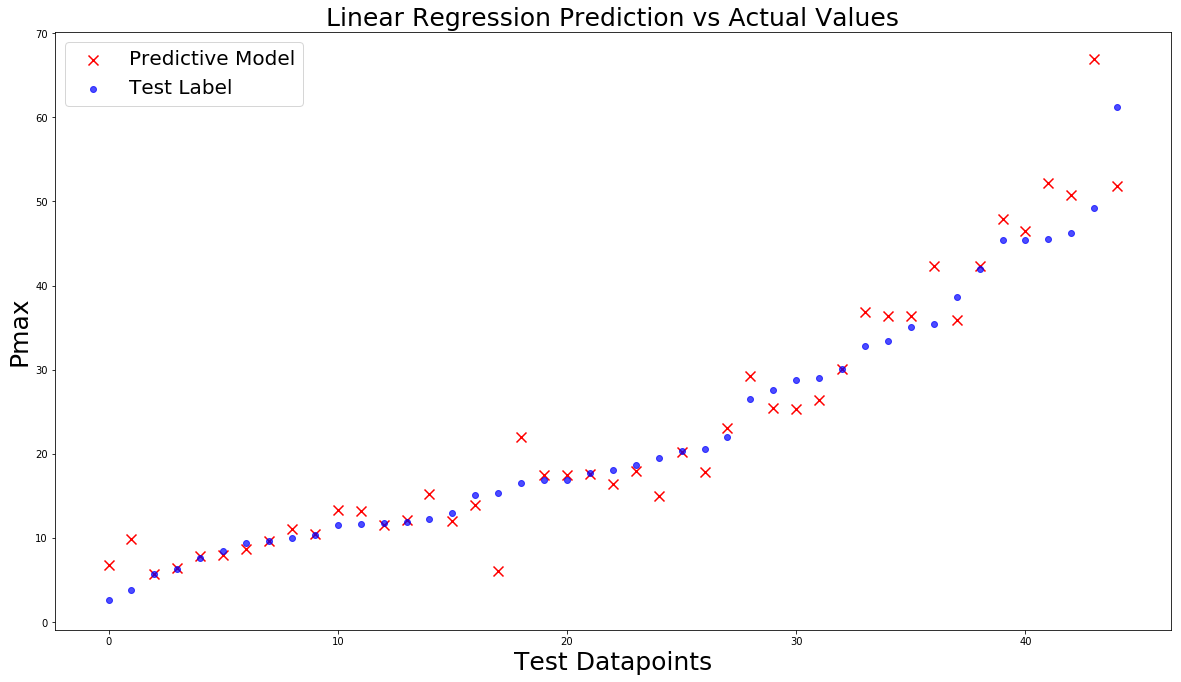

In [18]:
fig = plt.figure(figsize=(20,11))
plt.xlabel("Test Datapoints", fontsize = 25)
plt.ylabel("Pmax", fontsize = 25)
plt.title("Linear Regression Prediction vs Actual Values", fontsize = 25)

plt.scatter(index, pmax_pred, color = "r", label = "Predictive Model", marker = "x", s = 100)
plt.scatter(index, label, color = "b", alpha = 0.7, label = "Test Label")

plt.legend(loc = 2, prop = {"size" : 20})



plt.savefig("Linear_Regression_Plot.png")